In [1]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [2]:
foldpath = os.getcwd()+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)
datframe

,SMBHMASS,SecondaryMass,PROCAMASS,p0,e0,BHSpin,Trajectory Exit Reason,mismatch,faithfulness,snr2,DeltaNOrbits
0,4000000.0,10,6.200000e-18,6.085,0.7,0.86,Separatrix reached!,9.256290e-01,0.036362,1.328039,4.382295e-01
1,60000000.0,10,1.800000e-19,4.830,0.3,0.90,Integration reached time boundary. Boundary lo...,8.326673e-15,1.000000,0.000205,-7.978652e-10
2,100000.0,10,1.100000e-16,33.350,0.6,0.60,Separatrix reached!,1.099786e-02,0.994630,38.185669,2.164676e-03
3,4000000.0,10,5.100000e-18,6.305,0.2,0.66,Separatrix reached!,9.472229e-05,0.999874,10.755528,-6.795502e-03
4,800000.0,10,5.100000e-18,12.850,0.2,0.73,Separatrix reached!,0.000000e+00,1.000000,169.312464,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
132604,80000000.0,10,1.500000e-19,4.760,0.5,0.73,Integration reached time boundary. Boundary lo...,4.840572e-14,1.000000,0.000556,-4.956260e-10
132605,4000000.0,10,3.900000e-18,6.350,0.5,0.73,Separatrix reached!,1.095212e-07,1.000000,24.668066,-1.432664e-05
132606,100000.0,10,4.300000e-17,33.350,0.6,0.80,Separatrix reached!,-1.665335e-14,1.000000,39.475935,0.000000e+00
132607,300000.0,10,5.300000e-17,19.800,0.4,0.76,Separatrix reached!,7.247944e-01,0.264014,10.103411,1.499405e-01


In [3]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]

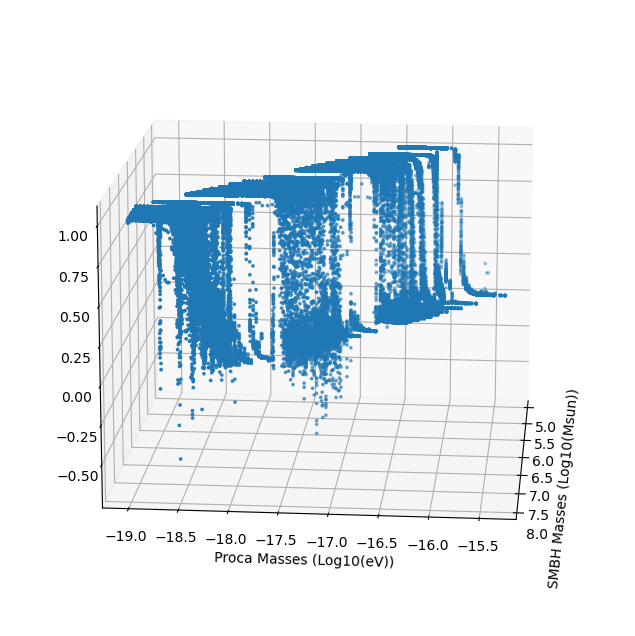

In [4]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

In [5]:
print(datframe["BHSpin"].unique())
print(datframe["e0"].unique())
datframe["SMBHMASS"].unique()

[0.86 0.9  0.6  0.66 0.73 0.8  0.7  0.76 0.63 0.83]
[0.7 0.3 0.6 0.2 0.4 0.5 0.1]


array([ 4000000., 60000000.,   100000.,   800000.,  8000000., 80000000.,
         900000.,   500000.,   300000.,   700000., 10000000.,   600000.,
        3000000., 30000000., 40000000., 50000000.,  1000000., 20000000.,
         400000.,  2000000.,   200000.,  7000000.,  5000000., 70000000.,
        6000000., 90000000.,  9000000.])

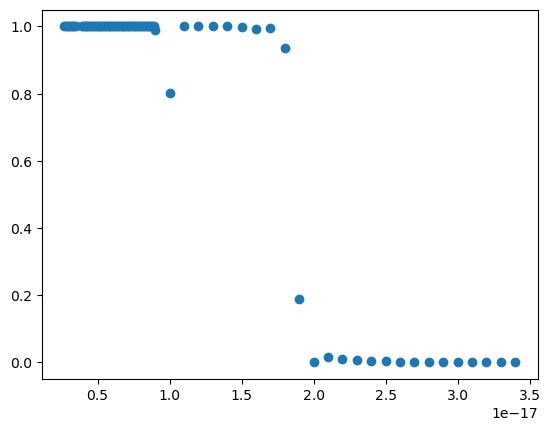

In [21]:
bhmass = 1000000
e0 = 0.1
bhspin = 0.8
newdat = datframe[(datframe["SMBHMASS"]==bhmass)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)]
xdat = newdat["PROCAMASS"]
ydat = (newdat["snr2"])**(1/2)
zdat = newdat["faithfulness"]
plt.scatter(xdat,zdat)